# Machine Learning in the Real World

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

## Reading the Income Classification Dataset

In [2]:
train_data = pd.read_csv('adult.data', header=None)

In [3]:
test_data = pd.read_csv('adult.test')
test_data.head(2)

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
test_data = pd.read_csv('adult.test', header=None, skiprows = [0])

## Adding Header to Data Files 

In [6]:
train_data.columns = ['age', 'workclass', 'observation-weight', 'education', 'education-num', 'marital-status', 
                      'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                      'hours-per-week', 'native-country', 'class']
test_data.columns = ['age', 'workclass', 'obervation-weight', 'education', 'education-num', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                     'hours-per-week', 'native-country', 'class']

In [7]:
train_data.head(5)

,age,workclass,observation-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
train_data.head(1).to_dict()

{'age': {0: 39},
 'capital-gain': {0: 2174},
 'capital-loss': {0: 0},
 'class': {0: ' <=50K'},
 'education': {0: ' Bachelors'},
 'education-num': {0: 13},
 'hours-per-week': {0: 40},
 'marital-status': {0: ' Never-married'},
 'native-country': {0: ' United-States'},
 'observation-weight': {0: 77516},
 'occupation': {0: ' Adm-clerical'},
 'race': {0: ' White'},
 'relationship': {0: ' Not-in-family'},
 'sex': {0: ' Male'},
 'workclass': {0: ' State-gov'}}

## Drop Unnecessary Column

In [9]:
train_data = train_data.drop('observation-weight', axis = 1)
test_data = test_data.drop('obervation-weight', axis = 1)

In [10]:
train_data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Specifying Data Types

In [11]:
binary_variables = ['class']
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']

## Type Conversion

In [12]:
train_data[categorical_variables].dtypes

workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [13]:
train_data[numeric_variables].dtypes

hours-per-week    int64
age               int64
capital-gain      int64
capital-loss      int64
dtype: object

## Categorical and Binary Variables to String

In [14]:
for variable in categorical_variables + binary_variables:
    train_data[variable] = train_data[variable].astype(np.str)
    test_data[variable] = test_data[variable].astype(np.str)

## Numeric Variables to Float

In [ ]:
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(np.float)
    test_data[variable] = test_data[variable].astype(np.float)

In [ ]:
train_data[numeric_variables].dtypes

## Remove Whitespaces

In [ ]:
for variable in categorical_variables + binary_variables:
    train_data[variable] = train_data[variable].map(lambda x : x.strip())
    test_data[variable] = test_data[variable].map(lambda x : x.strip())

## Binarize class label

In [41]:
train_data['class'] = train_data['class'].map(lambda x : '0' if x == '<=50K' else '1')
test_data['class'] = test_data['class'].map(lambda x : '0' if x == '<=50K' else '1')

In [40]:
test_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,1


## Impute Missing Values

In [17]:
# missing values are appearing as '?'
# replace them with np.nan

for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)

for variable in test_data.columns:
    test_data[variable] = test_data[variable].replace('?', np.nan)

In [ ]:
np.sum(train_data.isnull())

In [ ]:
np.sum(test_data.isnull())

In [21]:
imputed_variables = ['workclass','occupation','native-country']
imputed_values = train_data[imputed_variables].mode()
for variable in imputed_variables:
    train_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    test_data[variable].fillna(value = imputed_values[variable][0], inplace=True)

In [22]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


## Randomly Shuffle Training Data

In [23]:
train_data = train_data.sample(frac = 1)

## Data Statistics

In [24]:
train_data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [25]:
for variable in categorical_variables:
  print ("-------------------------------")
  print ("Histogram for " + variable)
  print ("-------------------------------")
  print (train_data[variable].value_counts())
  print ("")

-------------------------------
Histogram for workclass
-------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

-------------------------------
Histogram for education
-------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

-------------------------------
Histogram for education-num
-------------------------------
9     10501
10     7291
13     5355
14     1723
11     1382

## Class distribution

In [27]:
print (train_data['class'].value_counts())

1    32561
Name: class, dtype: int64


## Visualization

In [37]:
print(train_data[train_data['class'] == '0'])          

Empty DataFrame
Columns: [age, workclass, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, class]
Index: []


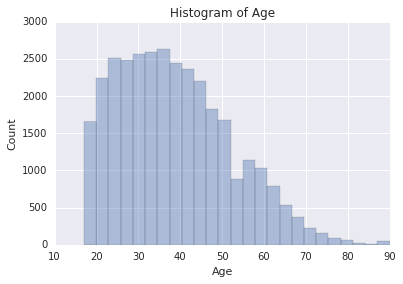

In [30]:
sns.distplot(train_data.age, bins = 25, kde = False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

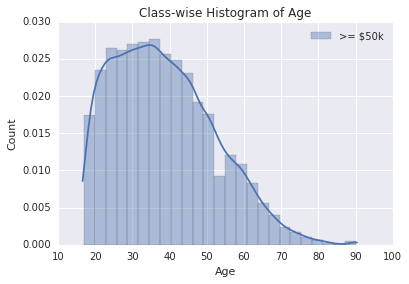

In [43]:
sns.distplot(train_data[train_data['class'] == '1'].age, bins = 25, kde = True, label = ">= $50k")
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

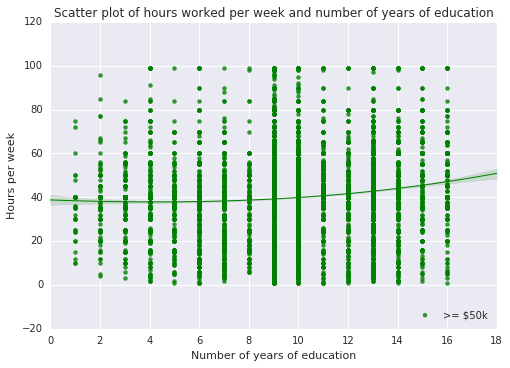

In [46]:
sns.set(color_codes=True)
train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot('education-num', 'hours-per-week', train_data[train_data['class'] == '1'], 
            scatter_kws={"marker": ".", "color": "green"},
            line_kws = {"linewidth": "1", "color": "green"},
            order = 3,
            label = '>= $50k')
plt.xlabel('Number of years of education')
plt.ylabel('Hours per week')
plt.legend(loc="lower right")
plt.title("Scatter plot of hours worked per week and number of years of education")

## Writing the pre-processed data to file

In [47]:
train_data.to_csv('income_train_data.csv', index = False, header = False)
test_data.to_csv('income_test_data.csv', index = False, header = False)

## Setting up Spark context

In [48]:
import pyspark;

sc = pyspark.SparkContext('local[1]')

## Data Parser and Dataframe Generator

In [49]:
from pyspark.sql import SQLContext, Row

def get_parsed_df(filename):
    linesRdd = sc.textFile(filename)
    sqlContext = SQLContext(sc)
    partsRdd = linesRdd.map(lambda l: l.split(","))
    rowRdd = partsRdd.map(lambda p: Row(age=float(p[0]), workclass=p[1], education=p[2], education_num=p[3], marital_status=p[4], occupation=p[5], relationship=p[6], race=p[7], sex=p[8], capital_gain=float(p[9]), capital_loss=float(p[10]), hours_per_week=float(p[11]), native_country=p[12], label=float(p[13])))
    return sqlContext.createDataFrame(rowRdd)

## Spark ML Pipeline

#### Spark ML standardizes APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline, or workflow. This section covers the key concepts introduced by the Spark ML API.

***ML Dataset / Dataframe***: Spark ML uses the SchemaRDD from Spark SQL as a dataset which can hold a variety of data types. E.g., a dataset could have different columns storing text, feature vectors, true labels, and predictions.

***Transformer***: A Transformer is an algorithm which can transform one SchemaRDD into another SchemaRDD. E.g., an ML model is a Transformer which transforms an RDD with features into an RDD with predictions.

***Estimator***: An Estimator is an algorithm which can be fit on a SchemaRDD to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a dataset and produces a model.

***Pipeline***: A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.

***Param***: All Transformers and Estimators now share a common API for specifying parameters.

## Model generation pipeline
<br/>

<img src="https://spark.apache.org/docs/1.2.1/img/ml-Pipeline.png" length="700px" width="700px" />

<br/>
## Prediction pipeline
<br/>

<img src="https://spark.apache.org/docs/1.2.1/img/ml-PipelineModel.png" length="700px" width="700px" />

## Writing Custom ML Estimator and Transformer

In [50]:
import bisect
import math

from pyspark.ml.pipeline import Transformer, Estimator
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.ml.util import keyword_only

################## ESTIMATOR IMPLEMENTATION ##################

class QuantileDiscretizer(Estimator, HasInputCol, HasOutputCol):

    @keyword_only
    def __init__(self, inputCol=None, outputCol=None, binCount=20):

        super(QuantileDiscretizer, self).__init__()
        self.binCount = Param(self, "binCount", "")
        self._setDefault(binCount=20)
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None, binCount=20):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)

    # getter and setter for parameters
    def setBinCount(self, value):
        self._paramMap[self.binCount] = value
        return self

    def getBinCount(self):
        return self.getOrDefault(self.binCount)


    def _fit(self, dataset):
        sortedRows = dataset.select(self.getInputCol())\
                       .sort(self.getInputCol())\
                       .collect()
        binBoundaries = []
        binBoundariesRequired = self.getBinCount() - 1
        index = 1
        binSize = math.floor(len(sortedRows) / self.getBinCount());
        for row in sortedRows:
            if index % binSize == 0:
                binBoundaries.append(row[self.getInputCol()])
            if len(binBoundaries) == binBoundariesRequired:
                break
            index = index + 1
            
        return QuantileDiscretizerModel(inputCol = self.getInputCol(), 
                                        outputCol = self.getOutputCol(), 
                                        binBoundaries = binBoundaries)

    
################## TRANSFORMER IMPLEMENTATION ##################

class QuantileDiscretizerModel(Transformer, HasInputCol, HasOutputCol):

    @keyword_only
    def __init__(self, inputCol=None, outputCol=None, binBoundaries=[]):
        super(QuantileDiscretizerModel, self).__init__()
        self.binBoundaries = Param(self, "binBoundaries", "")
        self._setDefault(binBoundaries=[])
        kwargs = self.__init__._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None, binBoundaries=[]):
        kwargs = self.setParams._input_kwargs
        return self._set(**kwargs)

    # getter and setter for parameters
    def setBinBoundaries(self, value):
        self._paramMap[self.binBoundaries] = value
        return self

    def getBinBoundaries(self):
        return self.getOrDefault(self.binBoundaries)


    def _transform(self, dataset):
        in_col = dataset[self.getInputCol()]
        out_col = self.getOutputCol()
        binBoundaries = self.getBinBoundaries()
        fg = udf(lambda x : "BIN_" + str(bisect.bisect_left(binBoundaries, x, lo=0, hi=len(binBoundaries))), StringType())
        return dataset.withColumn(out_col, fg(in_col))
    
sqlContext = SQLContext(sc)
data = sqlContext.createDataFrame([\
    (1, "I"),\
    (2, "LOVE"),\
    (3, "SPARK"),\
    (4, "EVEN"),\
    (5, "MORE"),\
    (6, "BECAUSE"),\
    (7, "OF"),\
    (8, "ML"),\
    (9, "PIPELINE"),\
    (10, ":)")\
], ["label", "words"])
discretizer = QuantileDiscretizer(inputCol = "label", outputCol = "label_binned", binCount = 3);
model = discretizer.fit(data)
print ("==== Original Data ===")
data.show() 
print ()
print ("==== Bin Boundaries ===")
print (model.getBinBoundaries())
print ()
print ("==== Transformed Data ===")
model.transform(data).show()


==== Original Data ===
+-----+--------+
|label|   words|
+-----+--------+
|    1|       I|
|    2|    LOVE|
|    3|   SPARK|
|    4|    EVEN|
|    5|    MORE|
|    6| BECAUSE|
|    7|      OF|
|    8|      ML|
|    9|PIPELINE|
|   10|      :)|
+-----+--------+


==== Bin Boundaries ===
[3, 6]

==== Transformed Data ===
+-----+--------+------------+
|label|   words|label_binned|
+-----+--------+------------+
|    1|       I|       BIN_0|
|    2|    LOVE|       BIN_0|
|    3|   SPARK|       BIN_0|
|    4|    EVEN|       BIN_1|
|    5|    MORE|       BIN_1|
|    6| BECAUSE|       BIN_1|
|    7|      OF|       BIN_2|
|    8|      ML|       BIN_2|
|    9|PIPELINE|       BIN_2|
|   10|      :)|       BIN_2|
+-----+--------+------------+



## Assembling a Spark ML Pipeline

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

feature_generation_stages = []
categorical_variables = ['workclass', 'education', 'education_num', 'marital_status', 
                         'occupation', 'relationship', 'race', 'sex', 'native_country']
numeric_variables = ['hours_per_week','age','capital_gain','capital_loss']

numeric_variables_binned = []
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    numeric_variables_binned.append(binned_output_column)
    discretizer = QuantileDiscretizer(inputCol = variable, outputCol = binned_output_column, binCount = 20)
    feature_generation_stages.append(discretizer)

categorical_variables_encoded_cols = []
for variable in categorical_variables + numeric_variables_binned:
    string_index_output_col = variable + "_index"
    one_hot_encoder_output_col = variable + "_encoder_vector"
    categorical_variables_encoded_cols.append(one_hot_encoder_output_col)
    string_indexer = StringIndexer(inputCol=variable, outputCol=string_index_output_col)
    one_hot_encoder = OneHotEncoder(dropLast=False, inputCol=string_index_output_col, outputCol=one_hot_encoder_output_col)
    feature_generation_stages.append(string_indexer);
    feature_generation_stages.append(one_hot_encoder);
    
assembler = VectorAssembler(
    inputCols=categorical_variables_encoded_cols,
    outputCol="features")

feature_generation_stages.append(assembler)
feature_generation_pipeline = Pipeline(stages=feature_generation_stages)

raw_training_df = get_parsed_df('income_train_data.csv');
training_df_pipeline_model = feature_generation_pipeline.fit(raw_training_df);
training_df = training_df_pipeline_model.transform(raw_training_df)

raw_testing_df = get_parsed_df('income_test_data.csv');
testing_df = training_df_pipeline_model.transform(raw_testing_df)

## Model tuning using Parameter Grid Search along with Cross Validation

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression()

model_generation_pipeline = Pipeline(stages = [lr])
paramGrid = ParamGridBuilder() \
  .addGrid(lr.maxIter, [5, 10]) \
  .addGrid(lr.regParam, [0.001, 0.0001]) \
  .build()

crossValidator = CrossValidator() \
  .setEstimator(model_generation_pipeline) \
  .setEvaluator(BinaryClassificationEvaluator()) \
  .setEstimatorParamMaps(paramGrid) \
  .setNumFolds(5)

model = crossValidator.fit(training_df)

## Prediction using the trained model

In [ ]:
rm -rf prediction*

In [ ]:
PREDICTION_FILE_NAME = 'prediction'

predicted_df = model.transform(testing_df)
predicted_df.select("rawPrediction", "label").write.save(PREDICTION_FILE_NAME, format = 'json')

In [ ]:
ls prediction/

In [ ]:
cat prediction/* > prediction.json; head prediction.json

## Understanding Model Performance

In [ ]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(df):
  y_true = df['label']
  y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)
  

with open('prediction.json', 'r') as f:
    data = f.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ",".join(data) + "]"
df = pd.read_json(data_json_str)
plotMetrics(df)